In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
train = pd.read_csv('income-training.csv')
test = pd.read_csv('income-testing.csv')

# Data cleaning
1. Data cleaning (20 marks):
While the data is made ready for analysis, several values are missing, and majority of the
features are categorical. For the data cleaning step, handle missing values however you see
fit and justify your approach. Provide some insight on why you think the values are missing
and how your approach might impact the overall analysis. Suggestions include filling the
missing values with a certain value (e.g. mean for continuous data, mode for categorical
data) and completely removing the features with missing values. Secondly, convert
categorical data into numerical data by encoding and explain why you used this particular
encoding method. These tasks can be done interchangeably i.e. encoding can be done first.


# 1.1

In [33]:
train['Occupation'].unique()

array(['Farming-fishing', 'Other-service', 'Transport-moving',
       'Craft-repair', 'Sales', 'Adm-clerical', 'Exec-managerial',
       'Tech-support', nan, 'Machine-op-inspct', 'Handlers-cleaners',
       'Protective-serv', 'Prof-specialty', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [34]:
number = LabelEncoder()
most = train.mode(axis =0)
train = train.drop(['Education'],1)
train['WorkClass'].fillna(train['WorkClass'].mode()[0], inplace=True)
train['Occupation'].fillna(train['Occupation'].mode()[0], inplace=True)
train['NativeCountry'].fillna(train['NativeCountry'].mode()[0], inplace=True)
train.loc[train['NativeCountry']!='United-States','NativeCountry'] = 'foreign'
train_pl = train.copy()
train_pl.head()

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [35]:
train['Sex'] = number.fit_transform(train['Sex'].astype('str'))
train['WorkClass'] = number.fit_transform(train['WorkClass'].astype('str'))
train['MaritalStatus'] = number.fit_transform(train['MaritalStatus'].astype('str'))
train['Occupation'] = number.fit_transform(train['Occupation'].astype('str'))
train['Relationship'] = number.fit_transform(train['Relationship'].astype('str'))
train['Race'] = number.fit_transform(train['Race'].astype('str'))
train['NativeCountry'] = number.fit_transform(train['NativeCountry'].astype('str'))
train = train.replace(['<50K','50-100K','>100K'],[0,1,2])


In [36]:
train.head()

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,6,179151,10,2,4,0,4,1,0,0,40,0,0
1,28,3,68021,10,4,7,1,4,0,0,0,30,0,0
2,24,3,233499,10,2,13,0,4,1,0,0,40,0,1
3,32,5,168782,5,2,2,0,4,1,0,0,32,0,0
4,55,5,105582,14,2,11,0,4,1,2228,0,50,0,0


## 1.2 Summary

In the dataset, some of the data is missing. My assumption is that it is possible someone refused to report on the tax return form, or some feature of the person can not be defined by existing choices, or even it is not applicable to that person. I Chose to use the mode value of the column to fill NAN values in the same column. In some instance, this might not be a problem, for example, in NativeCountry column, over 90% of the data is United States, and later it is proven NativeCountry has low importance affecting the IncomeBracket. In this case, fill NAN with mode 'United States' won't affect the model prediction. However, in other columns such as occupation, this might cause a problem. This practice might fill the column with the wrong value. It will furthur cause the model to train on the wrong data, therefore reduce the accruracy of the prediction.

To convert the categorical data to numerical data, I used LabelEncoder from sklearn library. The reason I used it is that it is easy to use, and some features such as occupation has so many sub-categories, using One Hot Encoder will easily create a dimensionality problem for computing later. However, the disadvantage is obvious. For example, [a = 0, b = 1, c= 2], but it doesn't necessarity mean b = (a+c)/ 2 just because 1 = (0+2)/2. The consequence might be lower accuracy of the model. 

## 2. Exploratory data analysis
2. Exploratory data analysis (15 marks):
a. Present 3 graphical figures that represent trends in the data. How could these trends be
used to help with the task of classification of income bracket? All graphs should be
readable and have all axes appropriately labelled.
b. Visualize the order of feature importance. Some possible methods include correlation
plot, or a similar method. Given the data, which of the original attributes in the data are
most related to an individual’s income bracket?

## Part a

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


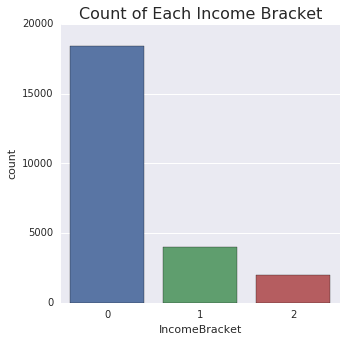

In [37]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(x='IncomeBracket',data=train)
ax.set_title("Count of Each Income Bracket", size=16)
plt.show()

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


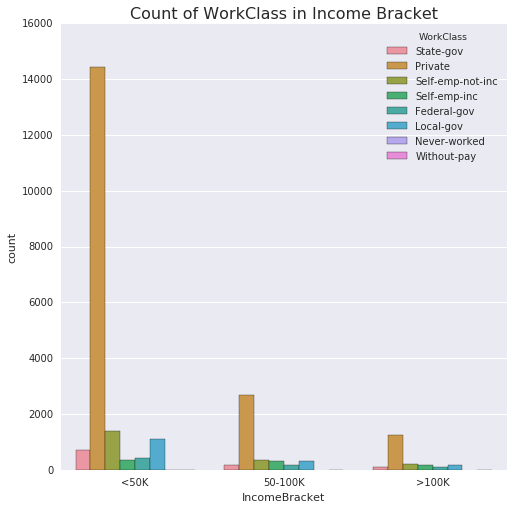

In [38]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="IncomeBracket", hue="WorkClass", data=train_pl)
ax.set_title("Count of WorkClass in Income Bracket", size=16)
plt.show()

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


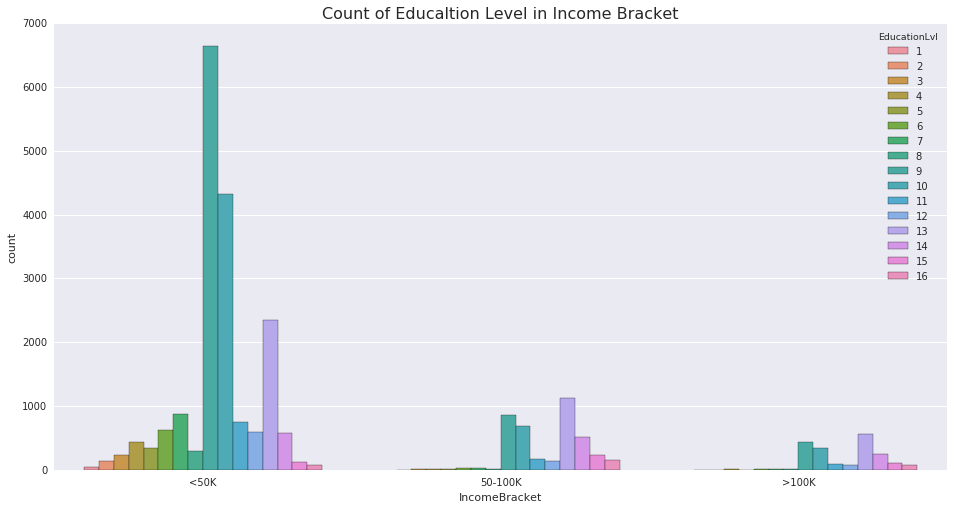

In [39]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(x="IncomeBracket", hue="EducationLvl", data=train_pl)
ax.set_title("Count of Educaltion Level in Income Bracket", size=16)
plt.show()

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


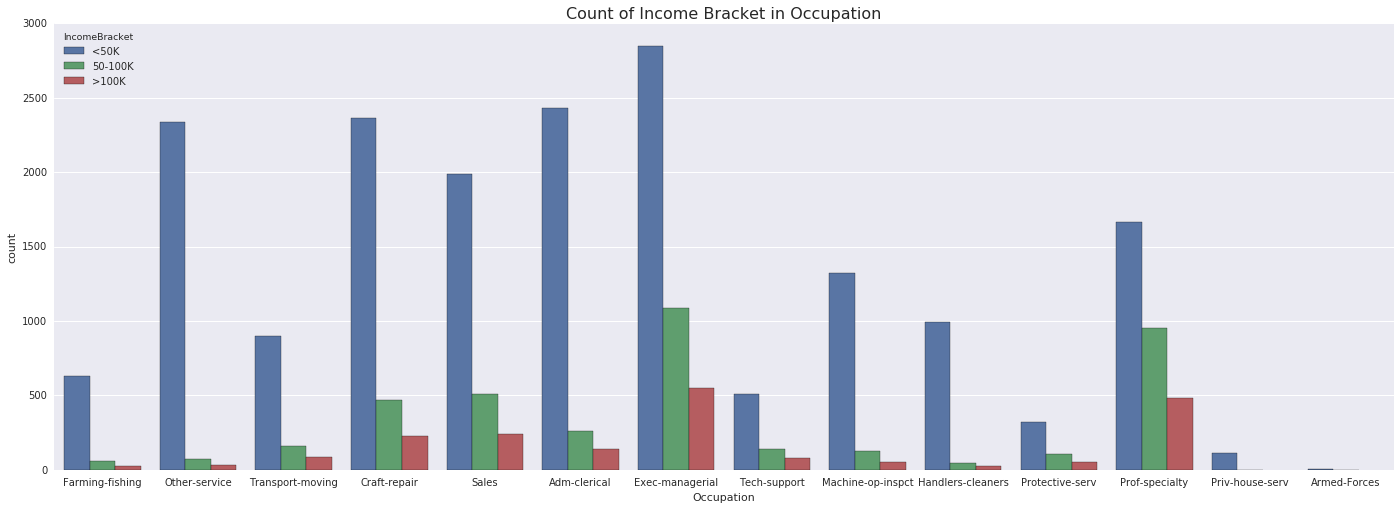

In [40]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(24,8))
ax = sns.countplot(x="Occupation", hue="IncomeBracket", data=train_pl)
ax.set_title("Count of Income Bracket in Occupation", size=16)
plt.show()

### 2.a Summary

The trends in the plots can help me identify whether the feaure affects income bracket. For example, in Count of Education Level in Income Bracket plot, we can clearly see that there are significanlty more people with level 9, 10 education that earn less than 50K than those who earn between 50 and 100K and over 100K. Also, we can tell there are more people with higher education level earning above 50K than under 50K. This trend can indicate that education level has positive correlation with the income bracket. 

## Part b

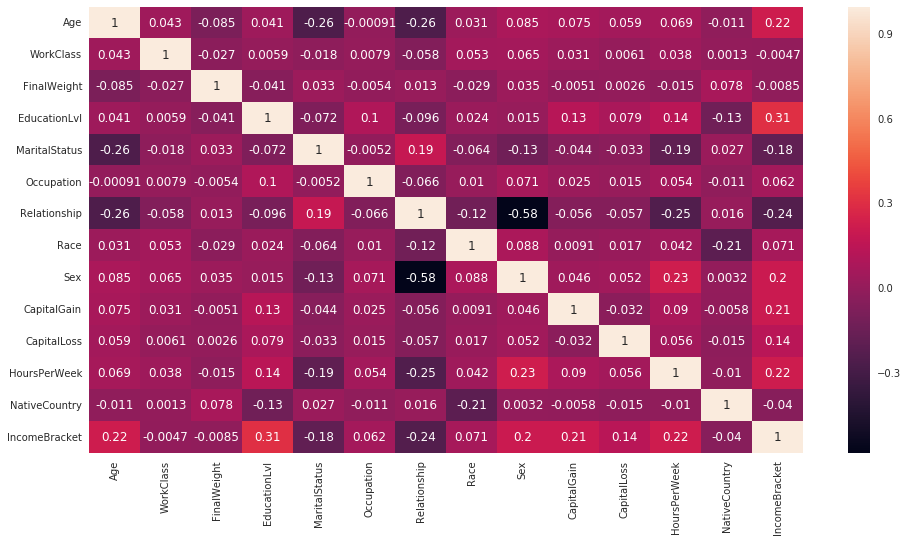

In [41]:
traincorr = train.corr()
fig1, ax = plt.subplots()

fig1.set_size_inches(16,8)
sns.heatmap(traincorr,annot = True)


### 2.b Summary

Based on the correlation plot above, the most important original features are EducationLvl and Relationship. However, this should not be the whole story. Since in previous step I used LabelEncoder in Relationship, this is can be simply be a false high correlation. The number assigned to each sub-category do not necessarily follow conventional logic,or the number assigned cannot represent the relationship between each subcategory.

# Part 3
Create at least one additional feature that is not originally part of the dataset but is based
on the original features of the dataset. Explain how feature engineering is a useful tool in
machine learning. Then select the features to be used for analysis either manually or
through some feature selection algorithm (e.g. regularized regression). Not all features
need to be used; features can be removed or added as desired although the same set of 
features must be used for all your machine learning models. Provide justification on why
you selected the set of features.

## 3.1 Create Feature

In [42]:
train['CapitalIncome'] = train['CapitalGain']-train['CapitalLoss']
train = train.drop(['CapitalGain'],1)
train = train.drop(['CapitalLoss'],1)
train.head()

,Age,WorkClass,FinalWeight,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,HoursPerWeek,NativeCountry,IncomeBracket,CapitalIncome
0,42,6,179151,10,2,4,0,4,1,40,0,0,0
1,28,3,68021,10,4,7,1,4,0,30,0,0,0
2,24,3,233499,10,2,13,0,4,1,40,0,1,0
3,32,5,168782,5,2,2,0,4,1,32,0,0,0
4,55,5,105582,14,2,11,0,4,1,50,0,0,2228


Why use feature engieering?

1 With good features, we can use simpler models, which runs faster and be easier to understand

2 If the feature can represent the data better, we can achieve the higher accuracy using same model.

3 Less features can reduce the chance of model overfitting.

## 3.2 Feature Selection

In [43]:
X = train.drop(['IncomeBracket'],1)
y = train['IncomeBracket']

In [44]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.17632087  0.04875984  0.19891747  0.12059212  0.06214653  0.07725778
  0.06627609  0.01542894  0.02059215  0.10374039  0.00744118  0.10252664]


In [45]:
train = train.drop(['NativeCountry'],1)

Based on the algorithm above, the  level of importance of each feature is similar to each other, as a result I decided to use all features except NativeCountry. Its importance level value is 0.00744118, which is way too low comparting to others. The features used in next part are:

1. Age
2. WorkClass
3. FinalWeight
4. EducationLvl
5. MaritalStatus
6. Occupation
7. Relationship
8. Race
9. Sex
10. HoursPerWeek
11. CapitalIncome

# 4. Model Implementation
Implement 4 different classification algorithms of your choice on the training data using
10-fold cross-validation. How does your model accuracy compare across the folds? What
is average and variance of accuracy for folds? Which model performed best? Give the
reason based on bias-variance trade-off. For each algorithm, briefly talk about what it does,
what its pros and cons are, and why you chose that algorithm

## 4.1 Logistic Regression


Logistic Regression

Logistic Regression is a supervised learning algorithm for binary classification problems. It finds the value for the coefficients of the weight of input variables. 

Pros:
* Low variance
* Provides probability for outcome
* works well with feature based boundaries

Cons:
* Based on variance and bias trade-off, low variance comes with price of high bias

In [46]:
import random
from sklearn import model_selection as skms
x_train = train.drop('IncomeBracket',axis =1)
y_train = train['IncomeBracket']

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,x_train ,y_train , cv=10)
print(scores)
print("Mean Accuracy: %0.2f" % (scores.mean()))
print("Variance of Accuracy: %0.6f" % (scores.std()))

[ 0.76841244  0.76800327  0.77495908  0.76872698  0.77058583  0.77058583
  0.76689881  0.77140516  0.77632118  0.7722245 ]
Mean Accuracy: 0.77
Variance of Accuracy: 0.002886


## 4.2 Decision Tree

Decision Tree:

It's an algorithm that uses recursive partitioning to classify the data. It "learns" by splitting the source set into subsets based on an attribute value test based on most predictive feature to split the data on. Predictiveness is based on gain in information.

Pros:
* No need to normalized the data
* Intuitive if-then rules are easy to extract and apply
* Best when applied to binary outcomes
* Easy to interpret
* Can handle numerical or categorical features
* Can handle missing data
* Only use most important features
* Can be used on very large or small data

Cons:
* Easy to overfit or underfit the model
* Cannot model interactions between features
* Large trees can be difficult to interpret

In [48]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(max_features=11,min_samples_leaf=100,random_state=42)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [49]:
scores = cross_val_score(clf2,x_train ,y_train , cv=10)
print(scores)
print("Mean Accuracy: %0.2f" % (scores.mean()))
print("Variance of Accuracy: %0.6f" % (scores.std()))

[ 0.80237316  0.80482815  0.80441899  0.80720426  0.8082753   0.80335928
  0.80090127  0.80745596  0.80581729  0.80090127]
Mean Accuracy: 0.80
Variance of Accuracy: 0.002527


## 4.3 KNN

KNN

KNN algorithm is a supervised learning algorithm that can be used for classification and regression based on feature similarity. An object is classified based on the vote of majority of its neighbours, hence k-nearest neighbour(KNN). This is often based on the distance of the object from its neighbours. Then the object is assigned to the class most common among its k nearest neighbours. 

Pros:
* No training phase
* Good for noisy data
* Insensitive to outliers
* No assumptions about the data distribution
* Algorithm is simple and easy to understand and interpret
* It can be used both for regression and classification
  
Cons:
* Hard to find best value of k
* sensitive to local structure of data
* Computationally expensive
* Sensitive to irrelevant features and scale of data
* If k value is very large, the computational time will be long

In [50]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = 99
clf3 = KNeighborsClassifier(n_neighbors=neighbor,algorithm='kd_tree')

# fitting the model
clf3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=99, p=2,
           weights='uniform')

In [51]:
scores = cross_val_score(clf3,x_train ,y_train , cv=10)
print(scores)
print("Mean Accuracy: %0.2f" % (scores.mean()))
print("Variance of Accuracy: %0.6f" % (scores.std()))

[ 0.76391162  0.76472995  0.77045827  0.76586165  0.76607948  0.76648914
  0.76485047  0.76485047  0.77140516  0.76894715]
Mean Accuracy: 0.77
Variance of Accuracy: 0.002468


## 4.4 Random Forest

Random Forest

The Random Forest Algorithm is a supervised learning algorithm that work as large collection of uncorreated decision trees, to do classification or regression problems. It creates an ensemble of decision trees and trains them with bagging method, averages multiple deep trees trained on different parts of the same training set. 

Pros:
* Can be used for both regression and classification.
* with enough trees the classifier won't overfit the model.
* The model is easy to use and straightforward to understand. 

Cons:
* Large number of trees will take long time to compute, and be ineffective for real-time prediction.
* Accurate prediction will require more trees but will slow down the speed

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(random_state=42)
clf4.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [53]:
scores = cross_val_score(clf4,x_train ,y_train , cv=10)
print(scores)
print("Mean Accuracy: %0.2f" % (scores.mean()))
print("Variance of Accuracy: %0.6f" % (scores.std()))

[ 0.78150573  0.79091653  0.78968903  0.78223496  0.78697255  0.79352724
  0.78779189  0.79680459  0.79393691  0.78287587]
Mean Accuracy: 0.79
Variance of Accuracy: 0.005035


## 4.5 Summary

1. Logistic Regression
    * Mean 0.77
    * Variance 0.002886
2. Decision Tree
    * Mean 0.80
    * Variance 0.002527
3. KNN
    * Mean 0.77
    * Variance 0.002468
4. Random Forest
    * Mean 0.79
    * Variance 0.002468
    
In the end, the decision tree algorithm gives the best results, with mean accuracy = 0.80. 
From bias-variance-trade-off point, Logistic Regression itself has low variance but high bias. Between Decision Tree and Random Forest, Random Forest acutally sacrifies some bias to achieve lower varaiance, therefore it is expected to see the mean accuracy score of Random Forest is a bit lower thant the Decision Tree. Here I think the Decision Tree is fully grown because the size of the training data, hence why it achieves such good accuracy.

# 5. Model Tuning

Improve the performance of the models from the previous step and select a final optimal
model using grid search
(parameter sweep) based on a metric (or metrics) that you choose. Choosing an optimal
model for a given task (comparing multiple classifiers on a specific domain) requires
selecting performance measures, such as accuracy, true positive rate (TPR), false positive
rate (FPR), etc, to compare the model performance. Explain how the chosen algorithm
applies to the data. Regardless of your chosen performance measures, your optimal model
must have an accuracy of at least 70% in cross-validation on the training set.


For this part, the accuracy score from sklearn.metrics.accuracy_score will be used as the metric the select best classification method

## 5.1 Logistic Regression

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameter_tuning = {'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'penalty':['l1','l2']}

gs1 = GridSearchCV(LogisticRegression(),
                  param_grid=parameter_tuning,
                  scoring = 'accuracy', cv=10)
gs1.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [55]:
print("Logistic Regression Best Score: %0.2f" % gs1.best_score_)
print( gs1.best_params_)

Logistic Regression Best Score: 0.78
{'penalty': 'l1', 'C': 0.2}


## 5.2 Decision Tree

In [56]:
parameter_tuning = {
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,20,60,100],
                    'min_samples_leaf':list(range(50,200,50)),
                    'max_features':[3,7,11]
                   }

gs2 = GridSearchCV(DecisionTreeClassifier(),
                  param_grid=parameter_tuning,
                  scoring = 'accuracy', cv=10)
gs2.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 20, 60, 100], 'min_samples_leaf': [50, 100, 150], 'criterion': ['gini', 'entropy'], 'max_features': [3, 7, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [63]:
print("Decision Tree Best Score: %0.6f" % gs2.best_score_)
print( gs2.best_params_)

Decision Tree Best Score: 0.805331
{'max_depth': None, 'min_samples_leaf': 100, 'criterion': 'entropy', 'max_features': 11}


## 5.3 KNN

In [58]:
parameter_tuning = {
                    'n_neighbors': list(range(5,205,100)),
                    'weights':['uniform','distance'],
                    'algorithm':['auto'],
                    'p':[1,2],
                    'n_jobs': [-1]
                   }

gs3 = GridSearchCV(KNeighborsClassifier(),
                  param_grid=parameter_tuning,
                  scoring = 'accuracy', cv=10)
gs3.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_jobs': [-1], 'weights': ['uniform', 'distance'], 'p': [1, 2], 'algorithm': ['auto'], 'n_neighbors': [5, 105]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [59]:
print("Decision Tree Best Score: %0.2f" % gs3.best_score_)
print( gs3.best_params_)

Decision Tree Best Score: 0.77
{'n_jobs': -1, 'p': 2, 'n_neighbors': 105, 'algorithm': 'auto', 'weights': 'distance'}


## 5.4 Random Forest

In [60]:
parameter_tuning = {
                    "n_estimators" : list(range(10,100,40)),
                    'max_depth': [None,20,60],
                    'min_samples_leaf':[50,100],
                    'criterion': ['gini', 'entropy'],
                    'random_state':[42],
                    'n_jobs': [-1]
                   }

gs4 = GridSearchCV(RandomForestClassifier(),
                  param_grid=parameter_tuning,
                  scoring = 'accuracy', cv=10)
gs4.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 90], 'n_jobs': [-1], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 20, 60], 'min_samples_leaf': [50, 100], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [62]:
print("Decision Tree Best Score: %0.6f" % gs4.best_score_)
print( gs4.best_params_)

Decision Tree Best Score: 0.807829
{'n_estimators': 90, 'n_jobs': -1, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 50, 'random_state': 42}


## 5.5 Summary

After the model tuning, the Random Forest Algorithm gives best prediction accuracy, with parameters of {'n_estimators': 90, 'n_jobs': -1, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 50, 'random_state': 42}.

# 6. Testing & Disscussion

Use your optimal model to make predictions on the test set. How does your model perform
on the test set vs. the training set? The overall fit of the model, how to increase the accuracy
(test, training)? Is it overfitting or underfitting? Why?
Insufficient discussion will lead to the deduction on marks. 

## 6.1 Testing

In [64]:
most = test.mode(axis =0)
test = test.drop(['Education'],1)
test['WorkClass'].fillna(test['WorkClass'].mode()[0], inplace=True)
test['Occupation'].fillna(test['Occupation'].mode()[0], inplace=True)
test['NativeCountry'].fillna(test['NativeCountry'].mode()[0], inplace=True)
test.loc[test['NativeCountry']!='United-States','NativeCountry'] = 'foreign'
test['Sex'] = number.fit_transform(test['Sex'].astype('str'))
test['WorkClass'] = number.fit_transform(test['WorkClass'].astype('str'))
test['MaritalStatus'] = number.fit_transform(test['MaritalStatus'].astype('str'))
test['Occupation'] = number.fit_transform(test['Occupation'].astype('str'))
test['Relationship'] = number.fit_transform(test['Relationship'].astype('str'))
test['Race'] = number.fit_transform(test['Race'].astype('str'))
test['NativeCountry'] = number.fit_transform(test['NativeCountry'].astype('str'))
test = test.replace(['<50K','50-100K','>100K'],[0,1,2])
test['CapitalIncome'] = test['CapitalGain']-test['CapitalLoss']
test = test.drop(['CapitalGain'],1)
test = test.drop(['CapitalLoss'],1)

In [67]:
clf5 = RandomForestClassifier(n_estimators= 90, n_jobs= -1, criterion='entropy', max_depth = None, min_samples_leaf= 50, random_state = 42)
clf5.fit(x_train,y_train)

x_test = test.drop('IncomeBracket',axis =1)
y_test = test['IncomeBracket']

scores = cross_val_score(clf5,x_test ,y_test , cv=10)
print(scores)
print("Mean Accuracy: %0.6f" % (scores.mean()))
print("Variance of Accuracy: %0.6f" % (scores.std()))

[ 0.78495503  0.79313164  0.79476697  0.79115479  0.7985258   0.79508197
  0.79262295  0.79918033  0.79672131  0.79590164]
Mean Accuracy: 0.794204
Variance of Accuracy: 0.003902


## 6.2 Summary

The model performs roughly the same in training and testing, achieving 0.8078 in training and 0.7942 in testing. From it, I can say the model fits, without much overfit or underfit. If those condition exists, there would be significant differences between the training accuracy and testing accuracy. If training accuracy is larger than testing accuracy, it means the model overfits. If the test accuracy is larger than training accuracy, this means the model underfits. Also, if look at the tune model learning curve plot below, the corss validation score and training score lines are close to each other, which resembles no overfitting, low variance. The accuracy of the model is not too bad, thus means there is not much bias, means not much underfitting.

To improve the model accuracy, we can do following things

* Feature Selection
    * Because the algorithm is sensitive to irrelevant features, we can do a lot of feature selection in the beginning. Use Recursive Feature Elimination, Regularization, etc.
* Use Multiple Algorithms
    * For example, use logistic regression then use Random Forest algorithm to achieve better accuracy
* Having more Training Data
    * Having more training data can produce a better model, at a cost of computation time and power.
* Back to Part 1 filling the Missing Data
    * Maybe remove the entire row with missing data will give the model a better training set
    
* Feature Engineering
    * Create new features or transform original features to make them represent the dataset more accurately
* Ensemble Methods
    * Bagging
    * Boosting



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

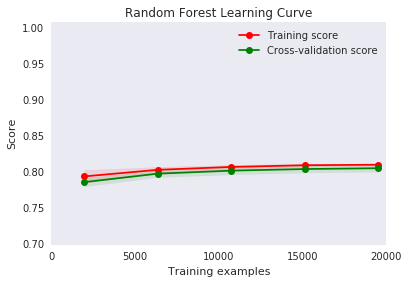

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Random Forest Learning Curve"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators= 90, n_jobs= -1, criterion='entropy', max_depth = None, min_samples_leaf= 50, random_state = 42)
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)